<a href="https://colab.research.google.com/github/catoverhat/Predictive-Analytics-for-Business/blob/main/Linear%20regression/multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
from scipy.stats import linregress, pearsonr
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_excel('linear-example-data.xlsx')

In [5]:
df.head()

,Client ID,Average Number of Tickets,Number of Employees,Value of Contract,Industry
0,TK669,90,561,200000,Retail
1,EY859,85,530,200000,Retail
2,TN571,5,82,25000,Manufacturing
3,LJ675,82,491,225000,Manufacturing
4,KH713,12,230,75000,Services


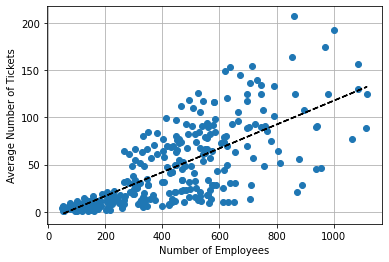

In [18]:
#plt.scatter(df['Number of Employees'], df['Average Number of Tickets'])
n = np.polyfit(df['Number of Employees'], df['Average Number of Tickets'], 1)
p = np.poly1d(n)
plt.plot(df['Number of Employees'], df['Average Number of Tickets'], 'o', df['Number of Employees'], p(df['Number of Employees']), '--k')
plt.xlabel('Number of Employees')
plt.ylabel('Average Number of Tickets')
plt.grid()

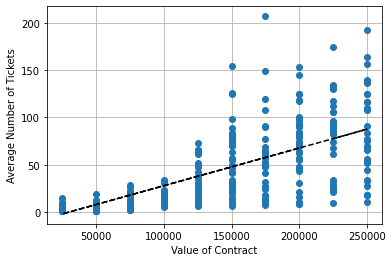

In [21]:
n = np.polyfit(df['Value of Contract'], df['Average Number of Tickets'], 1)
p = np.poly1d(n)
plt.plot(df['Value of Contract'], df['Average Number of Tickets'], 'o', df['Value of Contract'], p(df['Value of Contract']), '--k')
plt.xlabel('Value of Contract')
plt.ylabel('Average Number of Tickets')
plt.grid()

In [36]:
X = df['Value of Contract']
y = df['Average Number of Tickets']
slope, intercept, r_value, p_value, std_err = linregress(X, y)
slope, intercept, r_value, p_value, std_err

(0.00039772618609167266,
 -11.91359560719183,
 0.6737009492710767,
 4.909449272325791e-41,
 2.52729379285756e-05)

In [37]:
X = df[['Number of Employees', 'Value of Contract']]
y = df['Average Number of Tickets']
model = LinearRegression().fit(X, y)
model.score(X,y), model.intercept_, model.coef_

(0.5357656457254643, -11.995396540154978, array([0.10041398, 0.00010069]))

In [45]:
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
results.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                 -11.995397
Number of Employees     0.100414
Value of Contract       0.000101
dtype: float64

In [46]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Average Number of Tickets   R-squared:                       0.536
Model:                                   OLS   Adj. R-squared:                  0.533
Method:                        Least Squares   F-statistic:                     171.4
Date:                       Wed, 22 Jun 2022   Prob (F-statistic):           3.24e-50
Time:                               02:30:20   Log-Likelihood:                -1435.5
No. Observations:                        300   AIC:                             2877.
Df Residuals:                            297   BIC:                             2888.
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -11.9954      3.718     -3.226      0.001     -19.312      -4.679
Number of Employees     0.1004      0.014      7.238      0.000       0.073       0.128
Value of Contract       0.0001   4.72e-05      2.133      0.034    7.78e-06       0.000
==============================================================================
Omnibus:                       12.635   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.747
Skew:                           0.340   Prob(JB):                     0.000231
Kurtosis:                       3.937   Cond. No.                     3.52e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""